In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
from scipy.ndimage import gaussian_filter
import seaborn as sns

## SinWave with one-coil

In [18]:
paths = glob("C:/Users/Asentaja/Git/MicrorheologyProto/test/sinWave/*3.npy")
for i in range(len(paths)):
    datas = np.load(paths[i])
    if i == 0:
        df = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
        df["measurement"] = i
    else:
        dftemp = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
        dftemp["measurement"] = i
        df = pd.concat([df, dftemp])

In [19]:
dataBd = glob("C:/Users/Asentaja/Git/MicrorheologyProto/test/sinWave/*3.csv")
""
datas = pd.read_csv(dataBd[0], index_col = False)

print(datas.columns)

Index(['Idx', 'Measure_Date', 'Measure_Time', 'Temperature', 'GUSS_Value',
       'GUSS_ValueNP'],
      dtype='object')


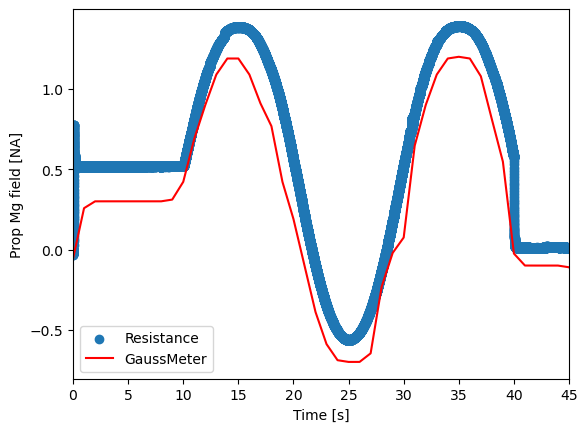

In [43]:
plt.scatter(df["index"],df["Mg"], label = "Resistance")
plt.plot(datas["Idx"]-1, gaussian_filter(-datas["GUSS_Value"]/10,0.5), color = "red", label = "GaussMeter")
plt.xlabel("Time [s]")
plt.ylabel("Prop Mg field [NA]")
plt.xlim([0,45])
plt.legend()

# Non-linear behvior

In [48]:
datapath = "C:/Users/Asentaja/Git/MicrorheologyProto/test/fixed/tuomi.csv"
df_Mg = pd.read_csv(datapath, index_col = False)

datapath = "C:/Users/Asentaja/Git/MicrorheologyProto/test/fixed/calib.npy"
driver = np.load(datapath)
df_drive = pd.DataFrame(driver.T, columns = ['index','aim','measured','Mg'])
            

Index(['Idx', 'Measure_Date', 'Measure_Time', 'Temperature', 'GUSS_Value',
       'GUSS_ValueNP'],
      dtype='object')


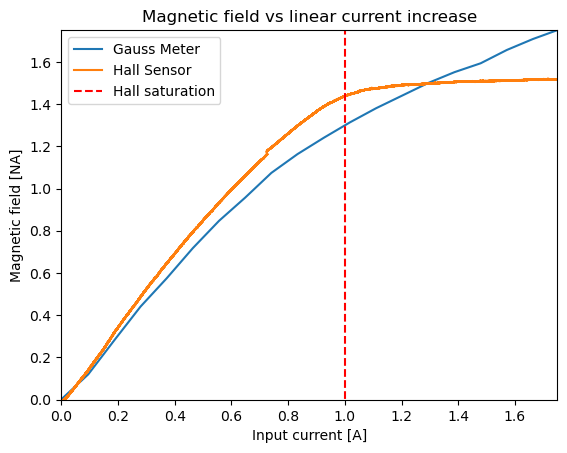

In [61]:
plt.title("Magnetic field vs linear current increase")
datas.loc[0,"GUSS_ValueNP"] =  0
plt.plot(np.linspace(0,2.4,len(df_Mg.loc[:,"GUSS_ValueNP"]))-0.09, df_Mg["GUSS_ValueNP"]*1e-3, label = "Gauss Meter")
plt.plot(df_drive["measured"],df_drive["Mg"], label = "Hall Sensor")

plt.xlabel("Input current [A]")
plt.ylabel("Magnetic field [NA]")
plt.xlim([0,1.75])
plt.ylim([0,1.75])

plt.vlines(1,-0.1,1.75, linestyle = "dashed", color = "red", label = "Hall saturation")
plt.legend()

# Magnetization dependence on the core extension length

In [118]:
def fetchDataNPY(paths):
    for i in range(len(paths)):
        datas = np.load(paths[i])
        print(datas, "\ni",i )
        if i == 0:
            df = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
            df["measurement"] = i
        else:
            dftemp = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
            dftemp["measurement"] = i
            df = pd.concat([df, dftemp])
    
    return df

def fetchDataCSV(paths):
    
    for i in range(len(paths)):
        if i == 0:
            df = pd.read_csv(paths[i], index_col = False)
            df["measurement"] = os.path.split(datapath[i])[1].split("_")[1][:-4]
        else:
            dftemp =  pd.read_csv(paths[i], index_col = False)
            dftemp["measurement"] = os.path.split(datapath[i])[1].split("_")[1][:-4]
            df = pd.concat([df, dftemp])
    return df
    

In [119]:
datapath = glob("C:/Users/Asentaja/Git/MicrorheologyProto/test/calib/*.csv")
Gauss = fetchDataCSV(datapath)
Gauss = Gauss.reset_index()

(0.0, 115.0)

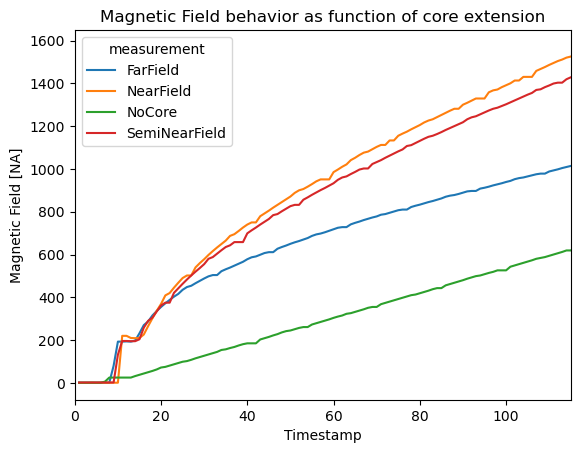

In [124]:
sns.lineplot(data = Gauss, x = "Idx", y = "GUSS_ValueNP", hue = "measurement")
plt.title("Magnetic Field behavior as function of core extension")
plt.ylabel("Magnetic Field [NA]")
plt.xlabel("Timestamp")
plt.xlim([0,115])

# Linear fit between Hall sensor and input current to convert detection to voltage

C:\Users\Asentaja\AppData\Local\Temp\ipykernel_13820\4122021871.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, _, _, _ = np.linalg.lstsq(x,y)


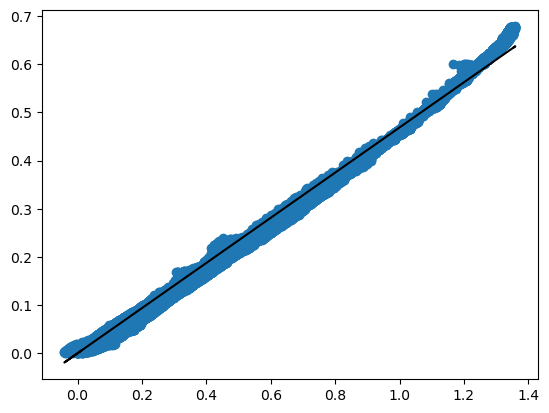

In [61]:
plt.scatter(df2["Mg"],df2["measured"]/0.27)
x = np.array(df2["Mg"].values)
x = x[:,np.newaxis]
y = np.array(df2["measured"].values/0.27)
k, _, _, _ = np.linalg.lstsq(x,y)
plt.plot(df2["Mg"],df2["Mg"]*k, color = "black")

In [ ]:
def fetchDataNPY(paths):
    for i in range(len(paths)):
        datas = np.load(paths[i])
        print(datas, "\ni",i )
        if i == 0:
            df = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
            df["measurement"] = i
        else:
            dftemp = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
            dftemp["measurement"] = i
            df = pd.concat([df, dftemp])
    
    return df

def fetchDataCSV(paths):
    
    for i in range(len(paths)):
        if i == 0:
            df = pd.read_csv(paths[i], index_col = False)
            df["measurement"] = os.path.split(datapath[i])[1].split("_")[1][:-4]
        else:
            dftemp =  pd.read_csv(paths[i], index_col = False)
            dftemp["measurement"] = os.path.split(datapath[i])[1].split("_")[1][:-4]
            df = pd.concat([df, dftemp])
    return df
    

# PID Magnetic field response 

In [6]:
pathH = "C:/Users/Asentaja/Git/MicrorheologyProto/test/StepWave/M1_StepB.npy"
pathG = "C:/Users/Asentaja/Git/MicrorheologyProto/test/StepWave/M1_StepB.csv"

MgHall = pd.DataFrame(np.load(pathH).T, columns = ['index','aim','measured','Mg'])
MgGauss = pd.read_csv(pathG, index_col = False)

pathH = "C:/Users/Asentaja/Git/MicrorheologyProto/test/StepWave/M1_StepCurrent.npy"
pathG = "C:/Users/Asentaja/Git/MicrorheologyProto/test/StepWave/M1_StepCurrent.csv"

CurrentHall = pd.DataFrame(np.load(pathH).T, columns = ['index','aim','measured','Mg'])
CurrentGauss = pd.read_csv(pathG, index_col = False)

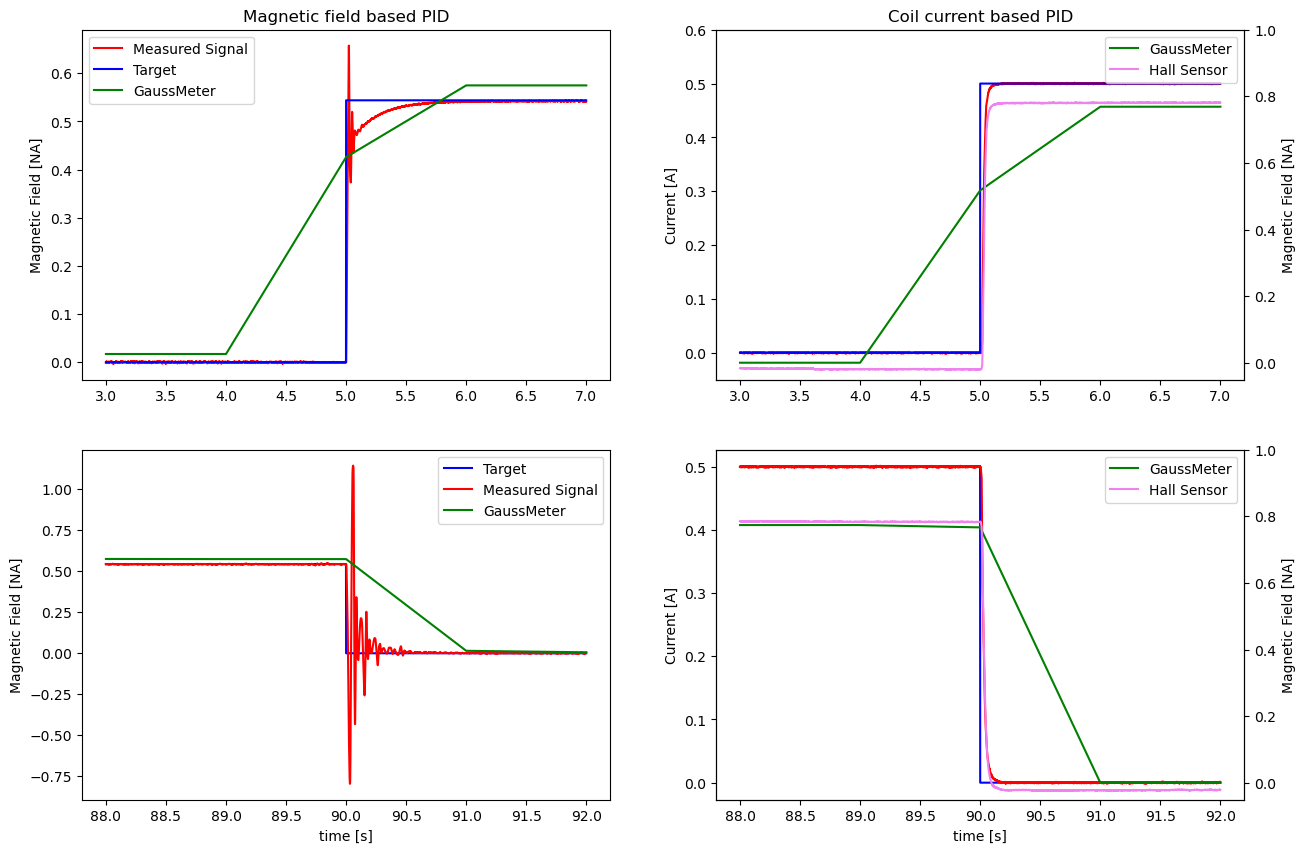

In [92]:
fig, ax  = plt.subplots(2, 2, figsize = (15,10))


start = 3000
end = 7000

target = np.ones(end-start)*0.68
target[:2000] = 0

ax[0,0].set_title("Magnetic field based PID")
ax[0,1].set_title("Coil current based PID")

ax[0,0].plot(MgHall["index"][start:end],MgHall["Mg"][start:end]*0.8, color = "red", label = "Measured Signal")
ax[0,0].plot(MgHall["index"][start:end],target*0.8, color = "blue", label = "Target")
ax[0,0].plot(MgGauss["Idx"][2:7],MgGauss["GUSS_ValueNP"][2:7]*1e-3, color = "green", label = "GaussMeter")
ax[0,0].legend()

ax[1,0].set_xlabel("time [s]")
ax[0,0].set_ylabel("Magnetic Field [NA]")

ax[0,1].plot(CurrentHall["index"][start:end],CurrentHall["measured"][start:end], color = "red", label = "Measured Signal")
ax[0,1].plot(CurrentHall["index"][start:end],CurrentHall["aim"][start:end], color = "blue", label = "Target")
#ax[0,1].legend()
ax[0,1].set_ylim([-0.05,0.6])

ax2 = ax[0,1].twinx()
ax2.plot(CurrentGauss["Idx"][3:8]-1,CurrentGauss["GUSS_ValueNP"][3:8]*1e-3, color = "green", label = "GaussMeter")
ax2.plot(CurrentHall["index"][start:end],CurrentHall["Mg"][start:end]*0.85, color = "violet", label = "Hall Sensor")
ax2.set_ylabel("Magnetic Field [NA]")
ax2.set_ylim([-0.05,1])
ax2.legend()


ax[1,1].set_xlabel("time [s]")
ax[0,1].set_ylabel("Current [A]")

start = 88*1000
end = 92*1000

target = np.ones(end-start)*0.68
target[2000:] = 0

ax[1,0].plot(MgHall["index"][start:end],target*0.8, color = "blue", label = "Target")
ax[1,0].plot(MgHall["index"][start:end],MgHall["Mg"][start:end]*0.8, color = "red", label = "Measured Signal")
ax[1,0].plot(MgGauss["Idx"][86:91]+1,MgGauss["GUSS_ValueNP"][86:91]*1e-3, color = "green", label = "GaussMeter")

start = 88*1000
end = 92*1000

target = np.ones(end-start)*0.68
target[2000:] = 0

ax[1,1].plot(CurrentHall["index"][start:end],CurrentHall["aim"][start:end], color = "blue", label = "Target")
ax[1,1].plot(CurrentHall["index"][start:end],CurrentHall["measured"][start:end], color = "red", label = "Measured Signal")

ax[0,1].set_ylim([-0.05,0.6])

ax[1,0].legend()

ax[1,1].set_ylabel("Current [A]")
ax[1,0].set_ylabel("Magnetic Field [NA]")


ax3 = ax[1,1].twinx()
ax3.plot(CurrentGauss["Idx"][87:92],CurrentGauss["GUSS_ValueNP"][87:92]*1e-3, color = "green", label = "GaussMeter")

ax3.plot(CurrentHall["index"][start:end],CurrentHall["Mg"][start:end]*0.85, color = "violet", label = "Hall Sensor")
ax3.set_ylabel("Magnetic Field [NA]")
ax3.set_ylim([-0.05,1])
ax3.legend()


# Calibration stuff

In [93]:
pathH = "C:/Users/Asentaja/Git/MicrorheologyProto/test/MgCalib/calib.npy"

MgHall = pd.DataFrame(np.load(pathH).T, columns = ['index','aim','measured','Mg'])


New conversion factor:  [0.52517792]


C:\Users\Asentaja\AppData\Local\Temp\ipykernel_9368\1804660348.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, _, _, _  = np.linalg.lstsq(x,y)


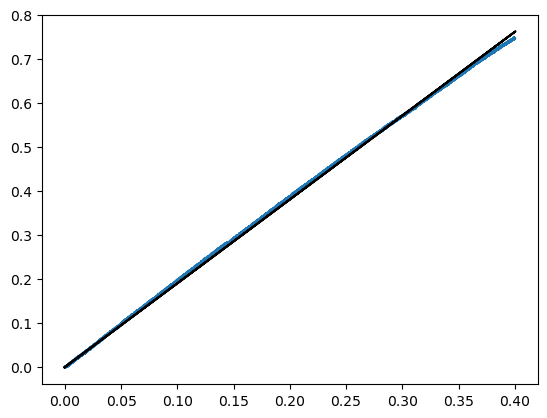

In [102]:
fig, ax  = plt.subplots(1, 1, figsize = (15,10))

maxIndex = np.where(MgHall["measured"].values >=0.5)[0][0]
x = MgHall["measured"].values[5000:maxIndex]
x = x-x[0]
x = x[:,np.newaxis]
y = MgHall["Mg"].values[5000:maxIndex]
y = y-y[0]
plt.plot(x,y)

k, _, _, _  = np.linalg.lstsq(x,y)
print("New conversion factor: ", 1/np.abs(k))

plt.plot(x,x*k, color = "black")

In [96]:
maxIndex

25000

## Testing

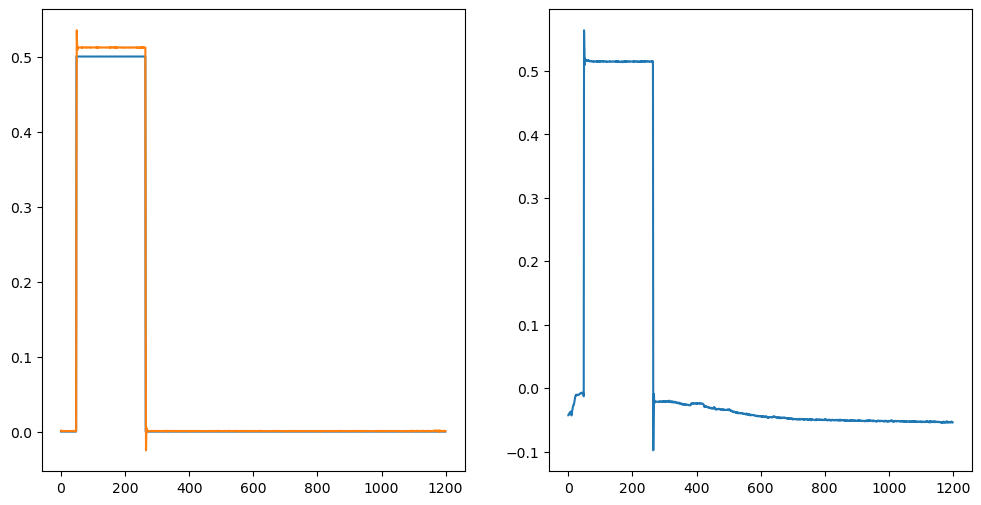

In [3]:

fig, ax  = plt.subplots(1, 2, figsize = (12,6))

ax[0].plot(df["index"],df["aim"])
df["measuredCorrected"] = df["measured"] + df["aim"]*6.93892537e-01
ax[0].plot(df["index"],df["measuredCorrected"])
ax[1].plot(df["index"],df["Mg"])


In [15]:
z = np.polyfit(df["aim"], df["aim"]-df["measured"], 1)

In [16]:
z

array([ 6.93892537e-01, -4.02305208e-04])

In [81]:
paths = glob.glob("C:/Users/Asentaja/Git/MicrorheologyProto/test/*.npy")
distances = [0,1.7,2.7,0.21,0]
keyList = np.arange(0,5)
df = pd.DataFrame(columns = ['index','aim','measured','Mg'])

for i in range(len(paths)):
    number = int(os.path.split(paths[i])[1].split("_")[1][0])
    if number in keyList:
        datas = np.load(paths[i])
        if i == 0:
            df = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
            df["distance"] = distances[number]
            df["measuredCorrected"] = df["measured"] + df["aim"]*6.05350073e-01
        else:
            df2 = pd.DataFrame(datas.T, columns = ['index','aim','measured','Mg'])
            df2["measuredCorrected"] = df2["measured"] + df2["aim"]*6.05350073e-01
            df2["distance"] = distances[number]
            df = pd.concat([df,df2], ignore_index=True)

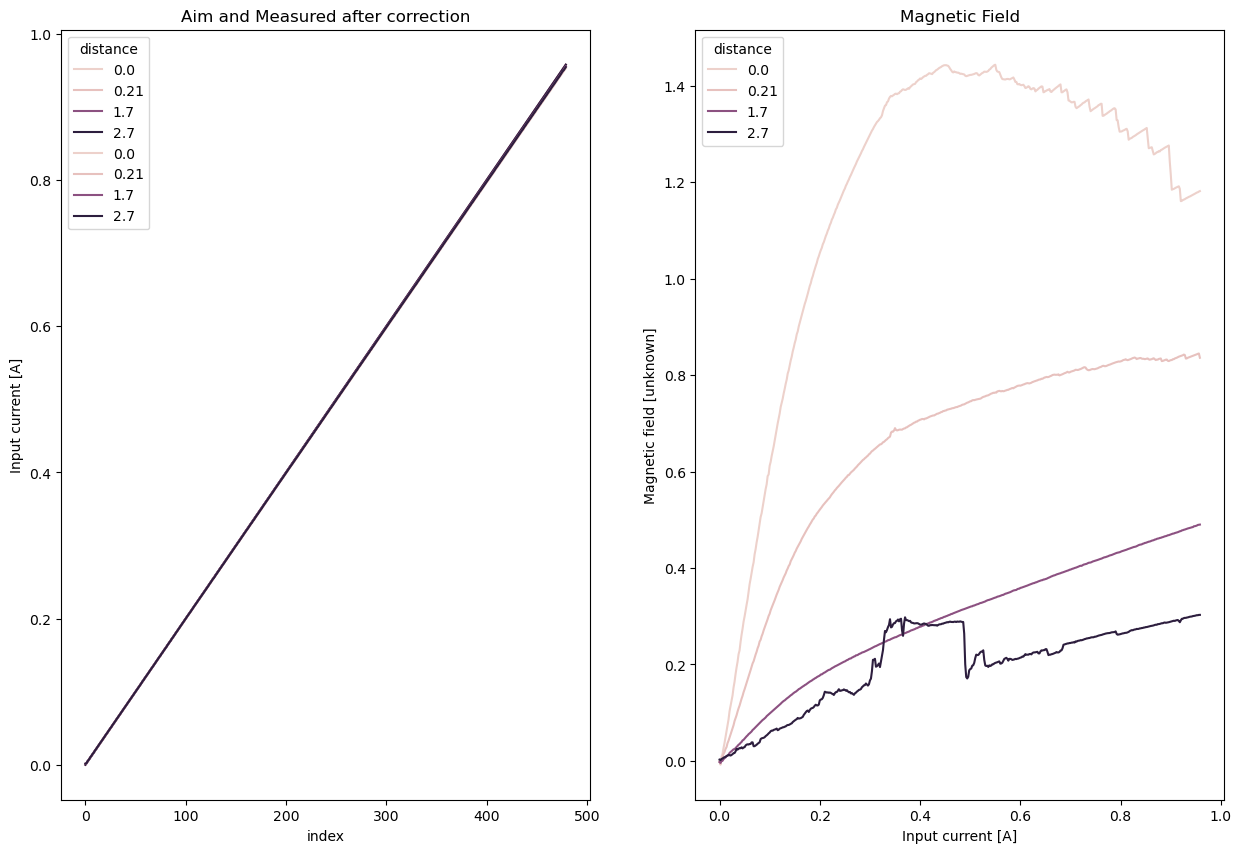

In [83]:

fig, ax  = plt.subplots(1, 2, figsize=(15, 10))

ax[0].set_title("Aim and Measured after correction")
ax[1].set_title("Magnetic Field")
sns.lineplot(ax = ax[0], data=df, x="index", y="aim", hue="distance")
sns.lineplot(ax = ax[0], data=df, x="index", y="measuredCorrected", hue="distance")
sns.lineplot(ax = ax[1], data=df, x="aim", y="Mg", hue="distance")
ax[0].set_ylabel("Input current [A]")

ax[1].set_ylabel("Magnetic field [unknown]")
ax[1].set_xlabel("Input current [A]")

plt.show()

Text(0.5, 0, 'Input current [A]')

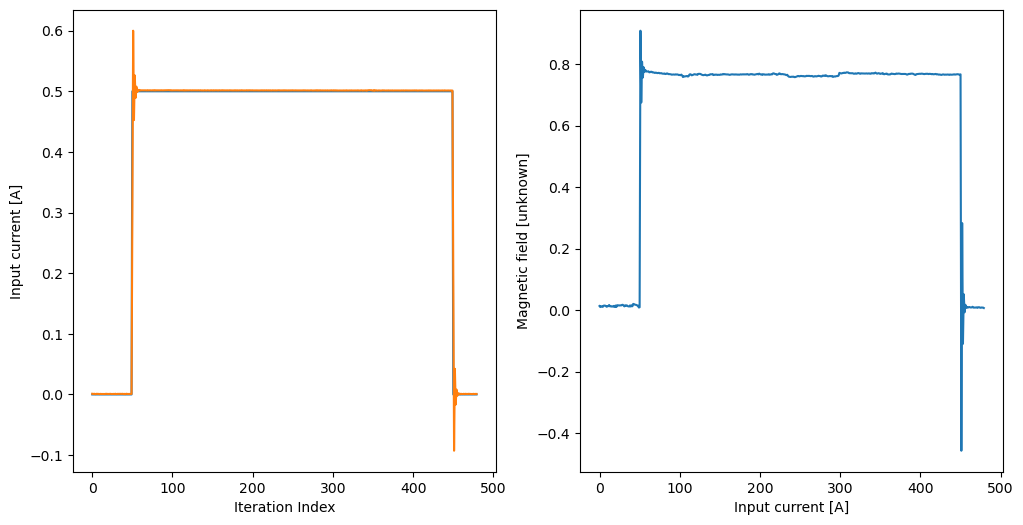

In [103]:

fig, ax  = plt.subplots(1, 2, figsize = (12,6))

ax[0].plot(df["index"],df["aim"])
df["measuredCorrected"] = df["measured"] + df["aim"]*6.05350073e-01
ax[0].plot(df["index"],df["measuredCorrected"])
ax[1].plot(df["index"],df["Mg"])

ax[0].set_ylabel("Input current [A]")
ax[0].set_xlabel("Iteration Index")

ax[1].set_ylabel("Magnetic field [unknown]")
ax[1].set_xlabel("Input current [A]")


kp = 15, 0.34ohm, 6.05350073e-01

kp = 10, 0.46ohm, 6.94266382e-01

array([0.        , 0.10434783, 0.20869565, 0.31304348, 0.4173913 ,
       0.52173913, 0.62608696, 0.73043478, 0.83478261, 0.93913043,
       1.04347826, 1.14782609, 1.25217391, 1.35652174, 1.46086957,
       1.56521739, 1.66956522, 1.77391304, 1.87826087, 1.9826087 ,
       2.08695652, 2.19130435, 2.29565217, 2.4       ])

In [37]:
dataBd = "C:/Users/Asentaja/Git/MicrorheologyProto/test/198A.csv"
""
datas = pd.read_csv(dataBd, index_col = False)

print(datas.columns)

samples = int(100*240/25)
current = np.arange(0,samples)*0.001*2

Index(['Idx', 'Measure_Date', 'Measure_Time', 'Temperature', 'GUSS_Value',
       'GUSS_ValueNP'],
      dtype='object')

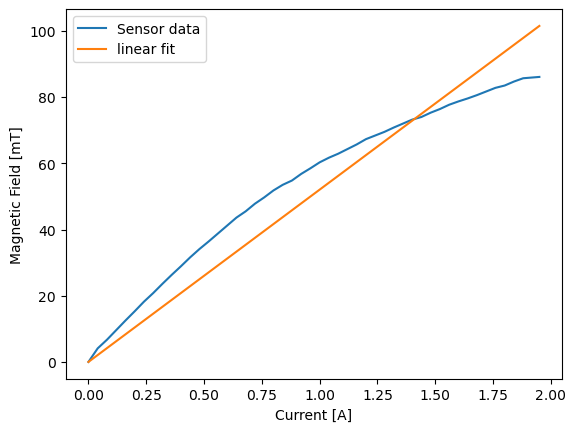

In [69]:
plt.plot(currentos, datas["GUSS_Value"]*1e-1, label = "Sensor data")
plt.xlabel("Current [A]")
plt.plot(currentos, a*currentos, label = "linear fit")
plt.ylabel("Magnetic Field [mT]")
plt.legend()

In [65]:
a, _, _, _  = np.linalg.lstsq(currentos[:,np.newaxis], datas["GUSS_Value"]*1e-1)

C:\Users\Asentaja\AppData\Local\Temp\ipykernel_5856\1134017597.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _  = np.linalg.lstsq(currentos[:,np.newaxis], datas["GUSS_Value"]*1e-1)


In [26]:
df 

,index,aim,measured,Mg
0,0.0,0.0000,0.000528,0.060386
1,1.0,0.0015,0.000446,0.058380
2,2.0,0.0030,0.000545,0.057886
3,3.0,0.0045,0.000545,0.053414
4,4.0,0.0060,0.000693,0.047823
...,...,...,...,...
1195,1195.0,1.7925,0.075014,0.239599
1196,1196.0,1.7940,0.075277,0.239977
1197,1197.0,1.7955,0.075277,0.240964
1198,1198.0,1.7970,0.075261,0.240388


In [55]:
currentos = np.append(current[::20],1.95)

In [27]:
from scipy.ndimage import gaussian_filter

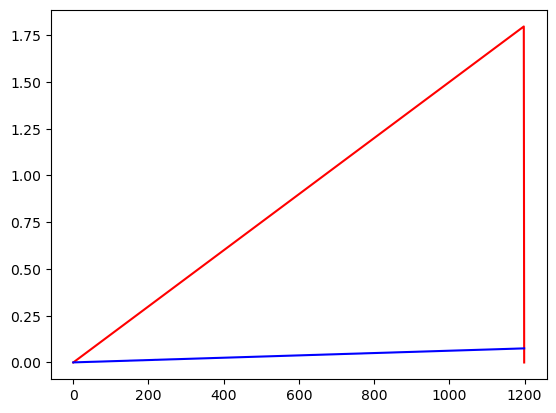

In [28]:
plt.plot(df["index"],df["aim"], color = "red")
plt.plot(df["index"],df["measured"], color = "blue")

In [31]:
z = np.polyfit(df["aim"],df["measured"], 1)
z

array([0.04145581, 0.00066177])

0.5640142781656858


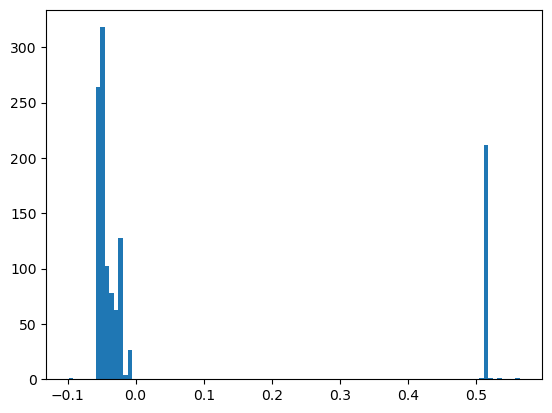

In [12]:
_ = plt.hist(df["Mg"], bins = 100)
print(df["Mg"].max())

In [18]:
i_mse = np.array([0,0.5,1,1.5,2])
i = np.array([0,0.08,0.15,0.22,0.28])

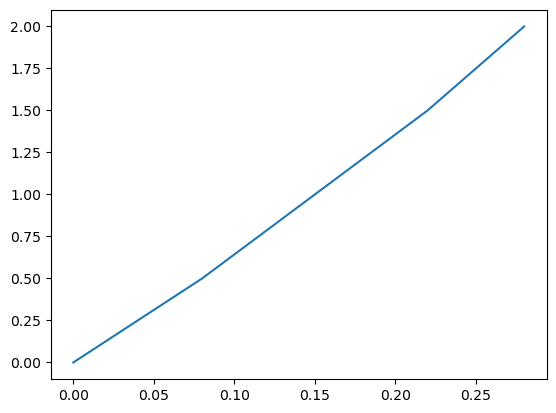

In [19]:
plt.plot(i,i_mse)

In [20]:
z = np.polyfit(i,i_mse, 1)

In [21]:
z

array([ 7.12540717, -0.04030945])